Exploratory data analysis with Pandas in banking

In [1]:
#download data using url
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import requests
import io
import zipfile

In [3]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'

In [4]:
# Download the file
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

In [5]:
# Extract the contents
zip_file.extractall("bank-additional")

In [6]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
pd.options.display.float_format = '{:.2f}'.format

Dataset Exploration

In [11]:
df = pd.read_csv(r'C:\Users\Family\DS_PRACTICE\EDA\notebooks\bank-additional\bank-additional\bank-additional-full.csv', sep = ';')

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
df.shape

(41188, 21)

In [15]:
# Attributing information

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [18]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [24]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

In [25]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()

In [29]:
len(numeric_cols)

10

In [28]:
len(non_numeric_cols)

11

In [30]:
df[non_numeric_cols].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [41]:
df['y'].value_counts(normalize=True)*100

y
no    88.73
yes   11.27
Name: proportion, dtype: float64

In [42]:
df['marital'].value_counts(normalize=True)*100

marital
married    60.52
single     28.09
divorced   11.20
unknown     0.19
Name: proportion, dtype: float64

In [43]:
# Sorting
df.sort_values(by="duration", ascending=False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.41,5195.80,no
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,yes
40537,27,admin.,single,high.school,no,no,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.70,94.03,-38.30,0.89,4991.60,no
13820,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,yes


In [44]:
df.sort_values(by=["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.40,92.43,-26.90,0.74,5017.50,yes
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.90,92.20,-31.40,0.87,5076.20,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.90,92.20,-31.40,0.88,5076.20,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.90,92.20,-31.40,0.87,5076.20,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.90,92.20,-31.40,0.87,5076.20,no


In [45]:
# Application of functions : apply and map

In [46]:
df.apply(np.max)

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                       yes
dtype: object

In [47]:
# Use map function for the value replacement

In [48]:
d = {'no': 0, "yes":1}
df['y'] = df['y'].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0


In [49]:
# Indexing and extracting data

In [50]:
print('Share of attracted clients =', '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 11.3%


Logical indexation by  column of a dataframe is very convenient it looks like this df[p(df['name'])] where p is a certain logical condition that is checked for each column of the name column . The result of such an indexation is a dataframe consisting only of the rows satisfying the condition p by the name column.

In [51]:
# What are the mean values of numerical features among the atrracted clients

In [54]:
df[numeric_cols][df['y'] == 1].mean()

age                40.91
duration          553.19
campaign            2.05
pdays             792.04
previous            0.49
emp.var.rate       -1.23
cons.price.idx     93.35
cons.conf.idx     -39.79
euribor3m           2.12
nr.employed      5095.12
dtype: float64

In [55]:
# What is the avg call duration of attracted clients

In [56]:
acd = round(df[df['y']==1]['duration'].mean(), 2)
acd_in_min = acd//60
print('Avg call duration for attracted clients : ', acd_in_min, 'min', int(acd)%60, 'sec')

Avg call duration for attracted clients :  9.0 min 13 sec


In [57]:
# What is average age of attracted and unmarried clients

In [58]:
print('Average age of unmarried clients = ', int(df[ (df['y'] == 1) & (df['marital'] == 'single') ]['age'].mean()), 'years')

Average age of unmarried clients =  31 years


Pivot Tables : 
Suppose we want to see how observations in our sample are distributed in the context of two features 'y' and 'marital status'. To do this we can build cross tabulation bt crosstab method

In [59]:
pd.crosstab(df['y'], df['marital'])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


In [62]:
pd.crosstab(df['y'], df['marital'], normalize='index')

marital,divorced,married,single,unknown
y,,,,
0,0.11,0.61,0.27,0.00
1,0.10,0.55,0.35,0.00


In [63]:
# Create a pivot table

In [65]:
df.pivot_table(['age', 'duration'], ['job'], aggfunc='mean')

,age,duration
job,,
admin.,38.19,254.31
blue-collar,39.56,264.54
entrepreneur,41.72,263.27
housemaid,45.50,250.45
management,42.36,257.06
retired,62.03,273.71
self-employed,39.95,264.14
services,37.93,258.40
student,25.89,283.68


In [67]:
# Visualization in Pandas
# Metho scatter_matrix allows you to visualize the pairwise dependencies between the features as well as the distribution of each feature on the diagonal. We will do it for numerical features

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='duration', ylabel='age'>,
        <Axes: xlabel='campaign', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='duration'>,
        <Axes: xlabel='duration', ylabel='duration'>,
        <Axes: xlabel='campaign', ylabel='duration'>],
       [<Axes: xlabel='age', ylabel='campaign'>,
        <Axes: xlabel='duration', ylabel='campaign'>,
        <Axes: xlabel='campaign', ylabel='campaign'>]], dtype=object)

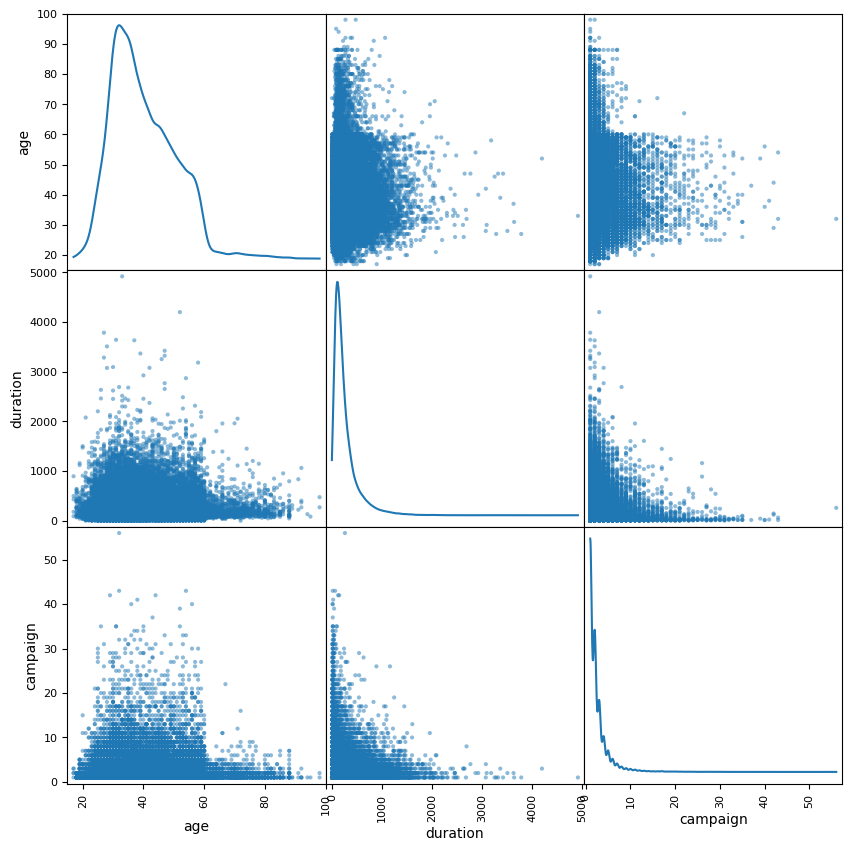

In [69]:
pd.plotting.scatter_matrix(
    df[['age', 'duration', 'campaign']],
    figsize= (10, 10),
    diagonal= 'kde'
)

In [70]:
# Now we will build histogram for features all together

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

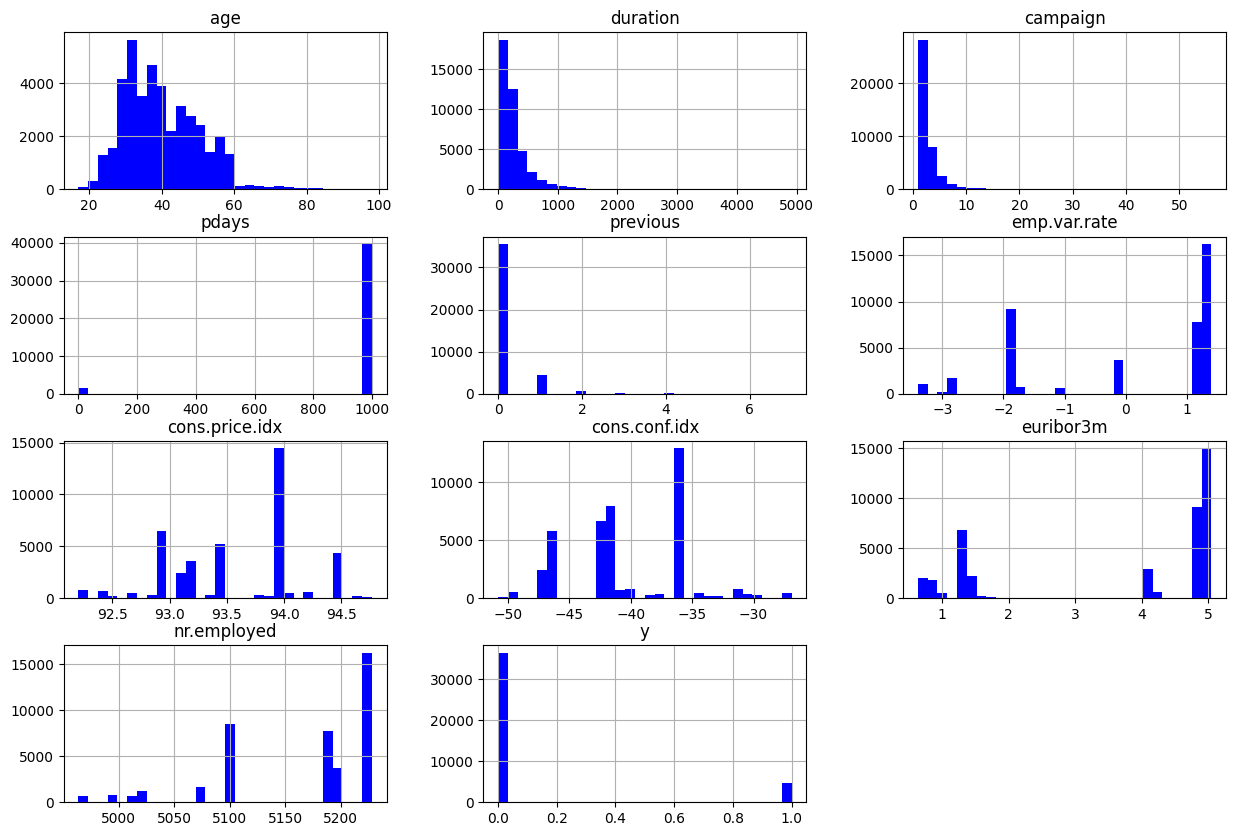

In [71]:
df.hist(color='b',
        bins=30,
        figsize=(15,10))

In [72]:
# histogram allows us to make preliminary assumptions about the data variability

In [73]:
# Boxplots allows us to compactly visualize the main characteristics of the feature distribution the median , lower and upper quartile , minimal and maximal outliers

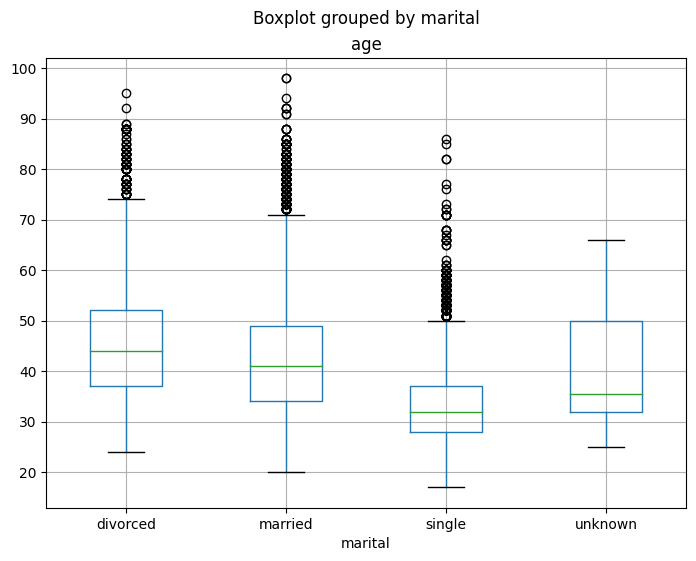

In [74]:
df.boxplot(column='age', by = 'marital')
plt.show()

In [75]:
# list of 10 clients by largest number of contacts 
df.sort_values(by='campaign', ascending=False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,56,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
18728,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,...,43,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,...,43,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,...,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,...,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,...,41,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
18754,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,...,40,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
11769,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,...,40,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
4114,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,...,39,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11593,43,technician,married,high.school,no,yes,no,telephone,jun,fri,...,37,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0


In [76]:
# Determine the median age and the number of contacts for different levels of client education

In [77]:
df.pivot_table(
    ['age', 'campaign'],
    ['education'],
    aggfunc=['mean', 'count']
)

mean           count         
                      age campaign    age campaign
education                                         
basic.4y            47.60     2.60   4176     4176
basic.6y            40.45     2.56   2292     2292
basic.9y            39.06     2.53   6045     6045
high.school         38.00     2.57   9515     9515
illiterate          48.50     2.28     18       18
professional.course 40.08     2.59   5243     5243
university.degree   38.88     2.56  12168    12168
unknown             43.48     2.60   1731     1731

<Axes: title={'center': 'age'}, xlabel='education'>

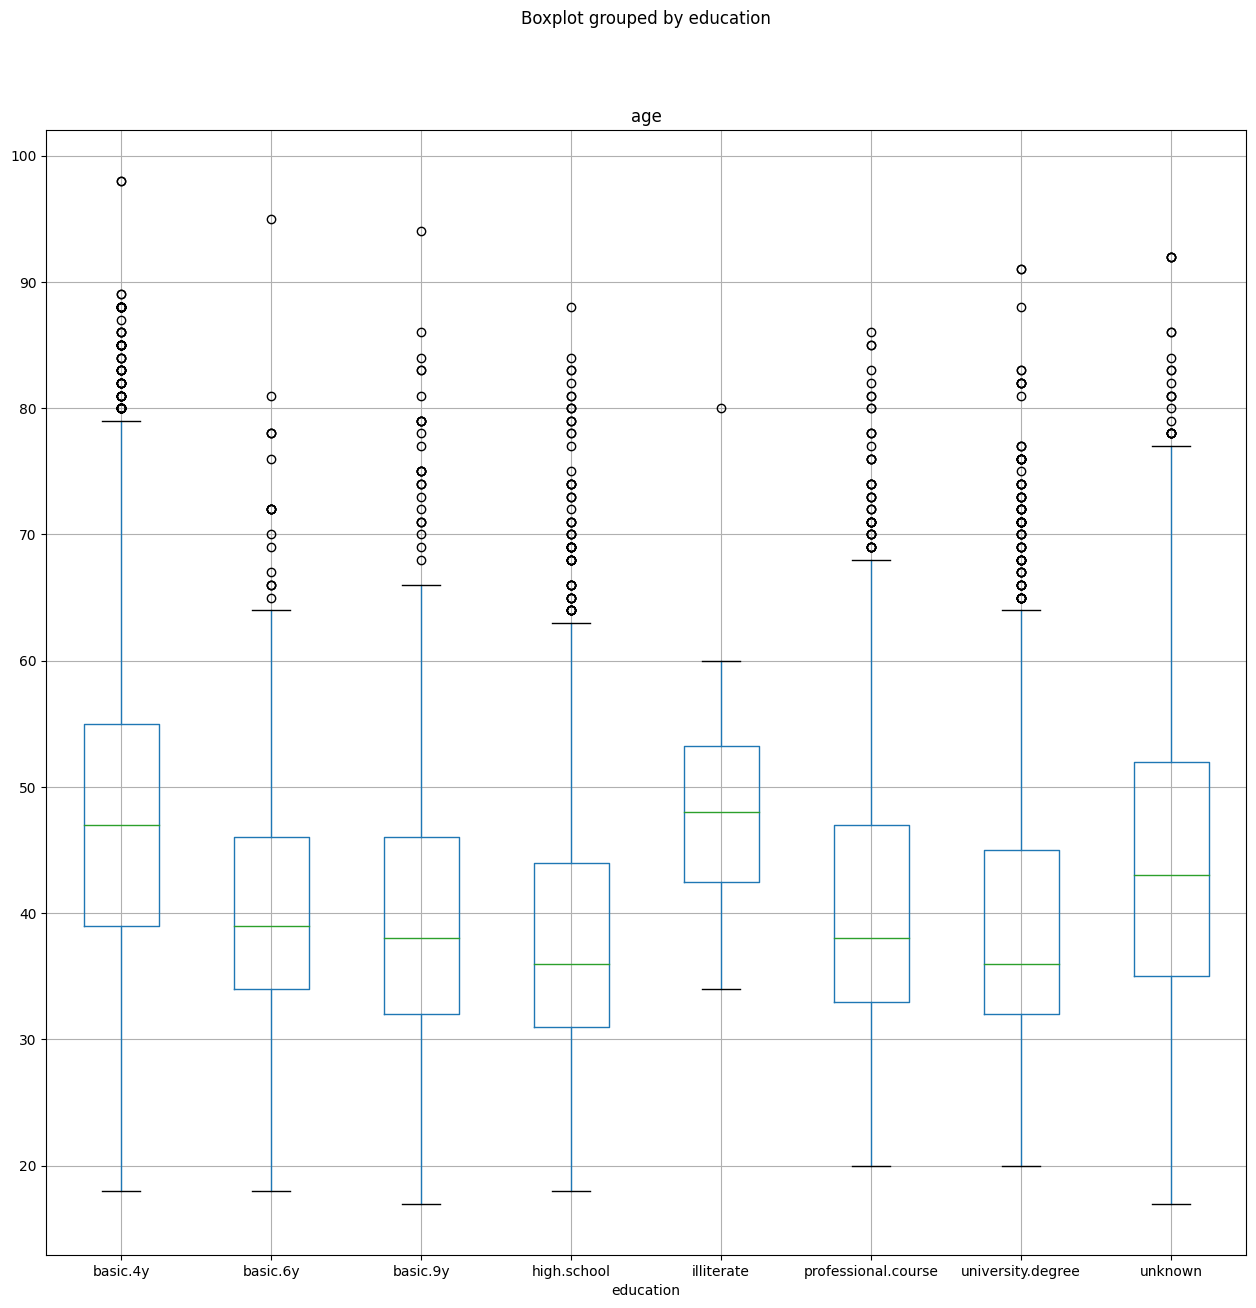

In [78]:
# Output boxplot to analyze the client age distribution by their education level
df.boxplot(column='age', by ='education', figsize=(15,15))